In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# DATA ANALYSIS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


D:\Coding\virtual environment Py\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

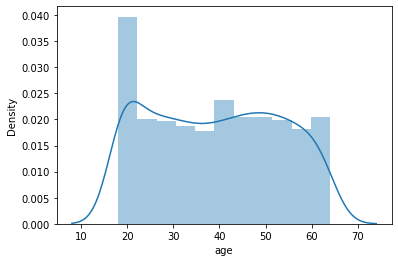

In [5]:
sns.distplot(df['age'])

<AxesSubplot:>

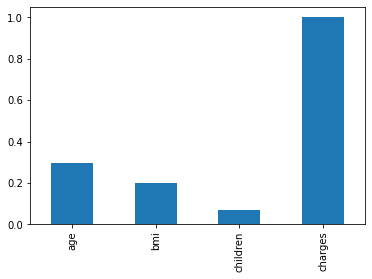

In [6]:
df.corr()['charges'].plot.bar()

<AxesSubplot:xlabel='age', ylabel='charges'>

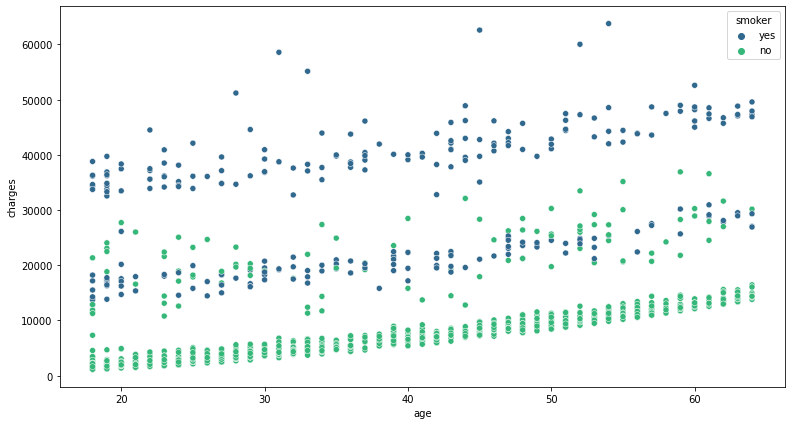

In [7]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='age',y='charges',data = df,hue='smoker',palette='viridis')

<AxesSubplot:xlabel='age', ylabel='charges'>

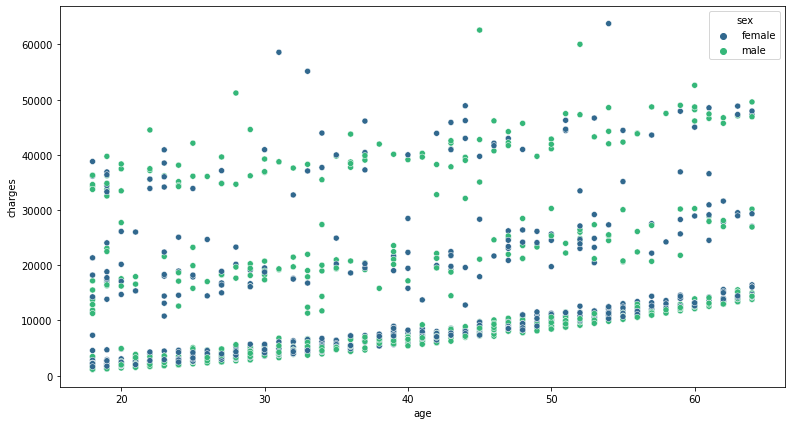

In [8]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='age',y='charges',data = df,hue='sex',palette='viridis')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

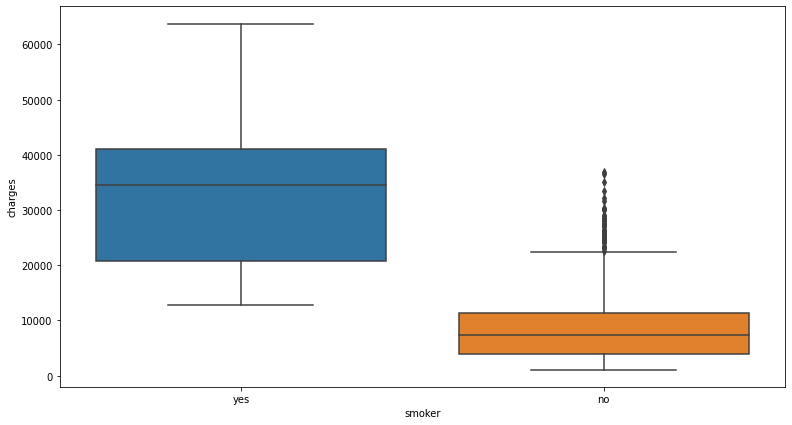

In [9]:
plt.figure(figsize=(13,7))
sns.boxplot(x='smoker',y='charges',data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

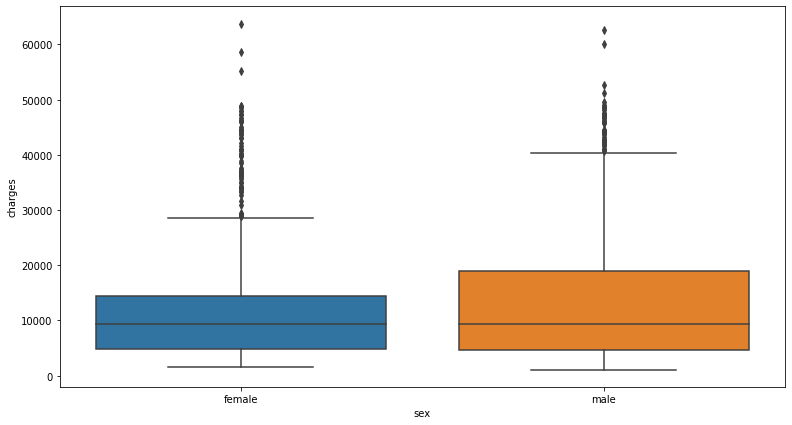

In [10]:
plt.figure(figsize=(13,7))
sns.boxplot(x='sex',y='charges',data=df)

In [11]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='age'>

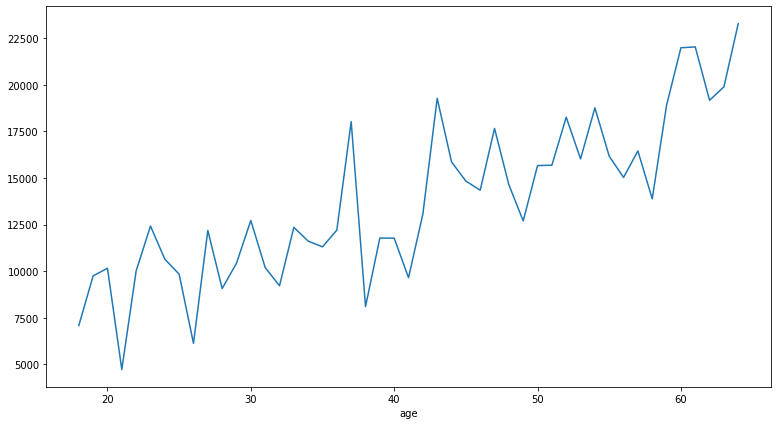

In [12]:
plt.figure(figsize=(13,7))
df.groupby('age')['charges'].describe()['mean'].plot()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

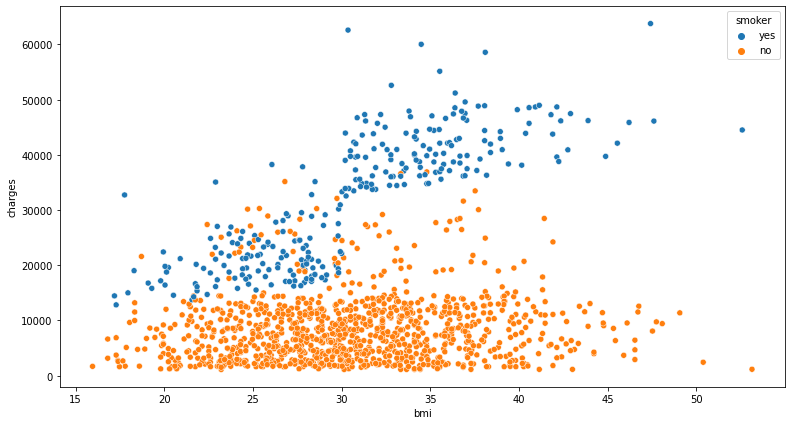

In [13]:
#BMI
plt.figure(figsize=(13,7))
sns.scatterplot(x='bmi',y='charges',data=df,hue = 'smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

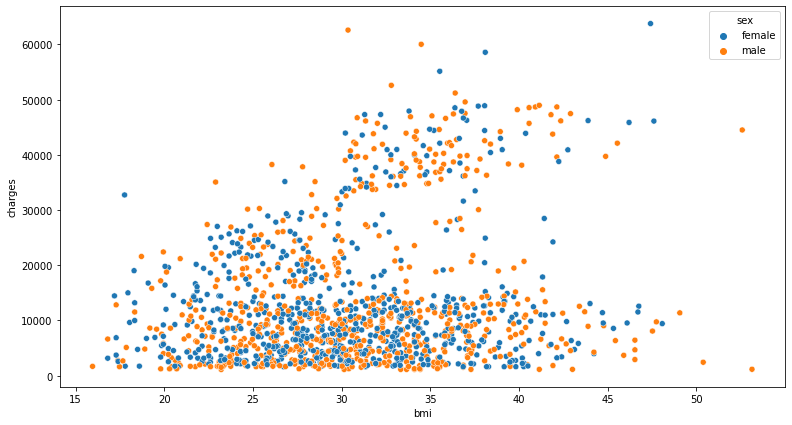

In [14]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='bmi',y='charges',data=df,hue = 'sex')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

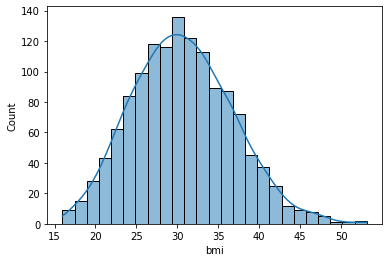

In [15]:
sns.histplot(df['bmi'],kde = True)

In [16]:
dummies = pd.get_dummies(df['sex'],drop_first = True)
df = pd.concat([df.drop('sex',axis = 1),dummies],axis =1)
df.head()

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


<AxesSubplot:>

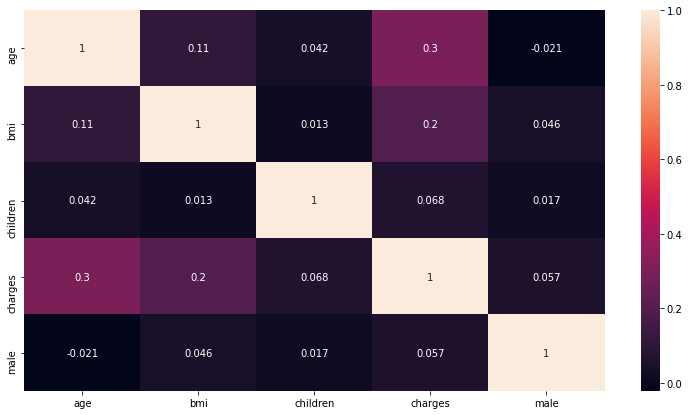

In [17]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),annot= True)

<AxesSubplot:xlabel='children', ylabel='count'>

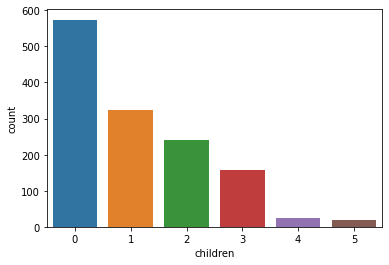

In [18]:
sns.countplot(x='children',data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

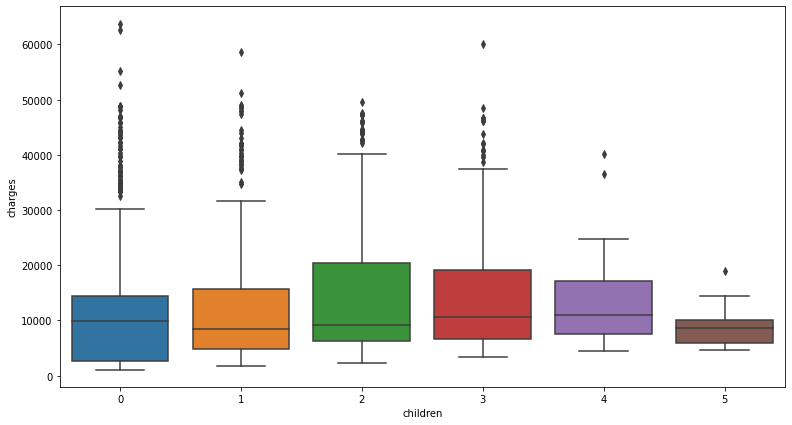

In [19]:
plt.figure(figsize=(13,7))
sns.boxplot(x='children',y='charges',data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

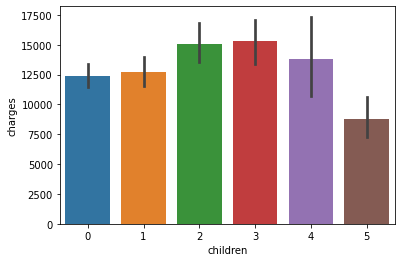

In [20]:
sns.barplot(x='children',y='charges',data=df)

In [21]:
df = df.drop('region',axis = 1)
df.head()

,age,bmi,children,smoker,charges,male
0,19,27.900,0,yes,16884.92400,0
1,18,33.770,1,no,1725.55230,1
2,28,33.000,3,no,4449.46200,1
3,33,22.705,0,no,21984.47061,1
4,32,28.880,0,no,3866.85520,1


In [22]:
dummies = pd.get_dummies(df['smoker'],drop_first=True)
df = pd.concat([df.drop('smoker',axis =1),dummies],axis = 1)
df.head()

,age,bmi,children,charges,male,yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [23]:
df = df.rename(columns={'yes':'smoker'})
df.head()

,age,bmi,children,charges,male,smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


<Figure size 936x504 with 0 Axes>

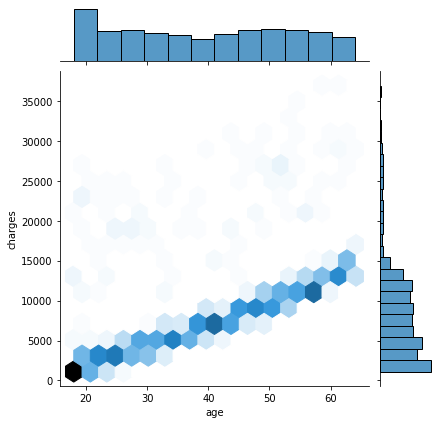

In [24]:
plt.figure(figsize=(13,7))
sns.jointplot(x='age',y='charges',data=df[df.smoker ==0],kind = 'hex')

# Data Preprocessing

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop('charges',axis =1)
y = df['charges']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
scaler = PolynomialFeatures(degree=2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression()

In [33]:
reg.fit(X_train,y_train)

LinearRegression()

In [34]:
prediction = reg.predict(X_test)

In [35]:
from sklearn.metrics import explained_variance_score

In [36]:
explained_variance_score(y_test,prediction)

0.8542059678760959

In [37]:
y_testdf = pd.DataFrame(y_test.values)
preddf = pd.DataFrame(prediction)

In [38]:
predvsac = pd.DataFrame([y_test.values,prediction]).T

In [39]:
predvsac.columns = ['test','pred']
predvsac

,test,pred
0,9095.06825,10317.055952
1,5272.17580,6382.243643
2,29330.98315,34441.322785
3,9301.89355,10267.164045
4,33750.29180,29391.728400
...,...,...
330,13217.09450,14011.681865
331,11944.59435,13480.760865
332,14358.36437,6457.251844
333,32548.34050,26993.669680


<AxesSubplot:xlabel='test', ylabel='pred'>

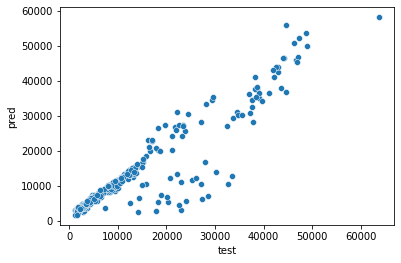

In [40]:
sns.scatterplot(x='test',y='pred',data = predvsac)

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100,criterion = 'mse',random_state = 1,n_jobs= -1)
forest.fit(X_train,y_train)

forest_test_pred = forest.predict(X_test)
explained_variance_score(y_test,forest_test_pred)

0.8455097835994128

# Neural Network (ANN)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
X = df.drop('charges',axis = 1)
X.head()

,age,bmi,children,male,smoker
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [56]:
y = df['charges']

In [57]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [58]:
from sklearn.preprocessing import PolynomialFeatures
scaler = PolynomialFeatures(degree = 2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
model = Sequential()

In [60]:
model.add(Dense(units = 21,activation='relu'))
model.add(Dense(units = 15,activation = 'relu'))
model.add(Dense(units = 7,activation='relu'))
model.add(Dense(units = 1,activation = 'relu'))
model.compile(loss='mse',optimizer = 'adam')

In [61]:
model.fit(x= X_train,y = y_train,validation_data = (X_test,y_test),epochs = 300)

Epoch 1/300
30/30 [==============================] - 0s 4ms/step - loss: 296345856.0000 - val_loss: 274306912.0000
Epoch 2/300
30/30 [==============================] - 0s 1ms/step - loss: 268850208.0000 - val_loss: 240629520.0000
Epoch 3/300
30/30 [==============================] - 0s 1ms/step - loss: 228014864.0000 - val_loss: 192603312.0000
Epoch 4/300
30/30 [==============================] - 0s 1ms/step - loss: 176387504.0000 - val_loss: 145168592.0000
Epoch 5/300
30/30 [==============================] - 0s 1ms/step - loss: 140395584.0000 - val_loss: 126387336.0000
Epoch 6/300
30/30 [==============================] - 0s 1ms/step - loss: 131113720.0000 - val_loss: 125831640.0000
Epoch 7/300
30/30 [==============================] - 0s 1ms/step - loss: 129876360.0000 - val_loss: 125336432.0000
Epoch 8/300
30/30 [==============================] - 0s 1ms/step - loss: 129503176.0000 - val_loss: 125025776.0000
Epoch 9/300
30/30 [==============================] - 0s 1ms/step - loss: 1290830

30/30 [==============================] - 0s 1ms/step - loss: 30928238.0000 - val_loss: 27351800.0000
Epoch 71/300
30/30 [==============================] - 0s 1ms/step - loss: 31382040.0000 - val_loss: 25825642.0000
Epoch 72/300
30/30 [==============================] - 0s 1ms/step - loss: 30621820.0000 - val_loss: 26353800.0000
Epoch 73/300
30/30 [==============================] - 0s 1ms/step - loss: 30532054.0000 - val_loss: 26143648.0000
Epoch 74/300
30/30 [==============================] - 0s 1ms/step - loss: 29982294.0000 - val_loss: 24876180.0000
Epoch 75/300
30/30 [==============================] - 0s 1ms/step - loss: 30113438.0000 - val_loss: 25743368.0000
Epoch 76/300
30/30 [==============================] - 0s 1ms/step - loss: 29990176.0000 - val_loss: 24389952.0000
Epoch 77/300
30/30 [==============================] - 0s 1ms/step - loss: 30023130.0000 - val_loss: 24144964.0000
Epoch 78/300
30/30 [==============================] - 0s 1ms/step - loss: 29868002.0000 - val_loss: 2

30/30 [==============================] - 0s 1ms/step - loss: 27243460.0000 - val_loss: 22788704.0000
Epoch 142/300
30/30 [==============================] - 0s 1ms/step - loss: 27489386.0000 - val_loss: 22280896.0000
Epoch 143/300
30/30 [==============================] - 0s 1ms/step - loss: 27387858.0000 - val_loss: 22571624.0000
Epoch 144/300
30/30 [==============================] - 0s 1ms/step - loss: 27626696.0000 - val_loss: 22283460.0000
Epoch 145/300
30/30 [==============================] - 0s 1ms/step - loss: 27234978.0000 - val_loss: 22479782.0000
Epoch 146/300
30/30 [==============================] - 0s 1ms/step - loss: 27158150.0000 - val_loss: 24583216.0000
Epoch 147/300
30/30 [==============================] - 0s 1ms/step - loss: 27985334.0000 - val_loss: 23136878.0000
Epoch 148/300
30/30 [==============================] - 0s 1ms/step - loss: 27336774.0000 - val_loss: 22373404.0000
Epoch 149/300
30/30 [==============================] - 0s 1ms/step - loss: 27412116.0000 - val

30/30 [==============================] - 0s 1ms/step - loss: 26970346.0000 - val_loss: 21820850.0000
Epoch 213/300
30/30 [==============================] - 0s 1ms/step - loss: 26825650.0000 - val_loss: 22007038.0000
Epoch 214/300
30/30 [==============================] - 0s 2ms/step - loss: 26631206.0000 - val_loss: 21803982.0000
Epoch 215/300
30/30 [==============================] - 0s 1ms/step - loss: 26709830.0000 - val_loss: 21895934.0000
Epoch 216/300
30/30 [==============================] - 0s 1ms/step - loss: 26694590.0000 - val_loss: 22455688.0000
Epoch 217/300
30/30 [==============================] - 0s 1ms/step - loss: 27133168.0000 - val_loss: 22491518.0000
Epoch 218/300
30/30 [==============================] - 0s 1ms/step - loss: 27055154.0000 - val_loss: 21940580.0000
Epoch 219/300
30/30 [==============================] - 0s 1ms/step - loss: 26648140.0000 - val_loss: 22015796.0000
Epoch 220/300
30/30 [==============================] - 0s 1ms/step - loss: 26714526.0000 - val

30/30 [==============================] - 0s 1ms/step - loss: 26699886.0000 - val_loss: 21961812.0000
Epoch 284/300
30/30 [==============================] - 0s 1ms/step - loss: 26280086.0000 - val_loss: 21687600.0000
Epoch 285/300
30/30 [==============================] - 0s 1ms/step - loss: 26379830.0000 - val_loss: 21545266.0000
Epoch 286/300
30/30 [==============================] - 0s 1ms/step - loss: 26303792.0000 - val_loss: 21528374.0000
Epoch 287/300
30/30 [==============================] - 0s 1ms/step - loss: 26200120.0000 - val_loss: 22169124.0000
Epoch 288/300
30/30 [==============================] - 0s 1ms/step - loss: 26228084.0000 - val_loss: 21750516.0000
Epoch 289/300
30/30 [==============================] - 0s 1ms/step - loss: 26403812.0000 - val_loss: 21809188.0000
Epoch 290/300
30/30 [==============================] - 0s 1ms/step - loss: 27003782.0000 - val_loss: 21637614.0000
Epoch 291/300
30/30 [==============================] - 0s 1ms/step - loss: 26347840.0000 - val

<AxesSubplot:>

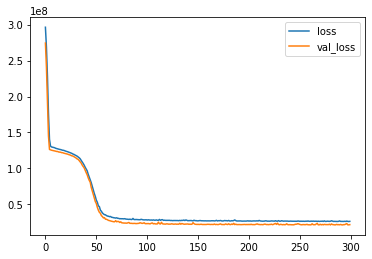

In [62]:
pd.DataFrame(model.history.history).plot()

In [63]:
predictions = model.predict(X_test)

In [64]:
explained_variance_score(y_test,predictions)

0.8527979348813526

# KNN Regressor

In [65]:
X = df.drop('charges',axis = 1)
y = df['charges']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [81]:
loss=  []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error = mean_squared_error(y_test,pred)
    loss.append(error)

<AxesSubplot:>

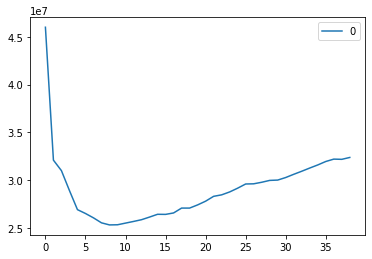

In [82]:
pd.DataFrame(loss).plot()

In [83]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
explained_variance_score(y_test,prediction)

0.8224254648651224